In [2]:
%reload_ext autoreload
%autoreload 2


In [29]:
import numpy as np
import random
from scipy import stats
from six.moves import urllib
import json

from load_data import loadnp
from counter import var_counter
from plot import histoplot
from stat_tests import norm_test
import mapping as mp

In [44]:
#loading data from raw data files, no specificed path goes to V2 directory
[xcoord, ycoord, array4D]=loadnp()

In [36]:
#stats accroos members
#computing mean and min-max ranges

[member_mean, member_max, member_min]=[np.mean(array4D,axis=0), np.amax(array4D,axis=0), np.amin(array4D,axis=0)]

In [6]:
'TODO:add test to checks tability of results (should always be the same) '
mean_over=var_counter(member_mean,20)
max_over=var_counter(member_max,20)
min_over=var_counter(member_min,10)

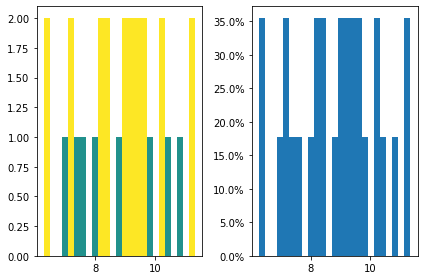

In [7]:
'NOTE: visualising dirtibution'
#plotting values across 28 mmbers (1 location, 1 month)
month=random.randint(0,len(array4D[0,:,0,0])-1)
xloc=random.randint(0,len(array4D[0,0,:,0])-1)
yloc=random.randint(0,len(array4D[0,0,0,:])-1)

vars=array4D[:,month,xloc,yloc]

ysort=np.sort(vars)
histoplot(ysort)


In [8]:
'NOTE: testing for normal distribution'
norm_results=norm_test(array4D) #total, fitted, fails, Dcrit, stat_array
total=norm_results[0]
fitted=norm_results[1]
fails=norm_results[2]
Dcrit=norm_results[3]
stat_array=norm_results[4]
np.savez('../6_Results/data/norm_results',norm_results)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/lib/npyio.py:713: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)


In [9]:
print(str(fitted)+" fit a normal distribution out of : "+str(total)+" with critical value of: "+str(Dcrit))
print("success rate: " +str(fitted/total))

342742 fit a normal distribution out of : 342914 with critical value of: 0.25
success rate: 0.999498416512595


In [10]:
'NOTE: calculating p90 for all time-space points and saving'
p90_array=np.percentile(array4D,90,axis=0)
np.savez('../6_Results/data/p90',p90_array)

In [11]:
'TODO:plot spatial distribution of values, 3D histogram?'

'TODO:plot spatial distribution of values, 3D histogram?'

In [46]:
latlonarray=mp.bulkOSGB36toWGS84(xcoord,ycoord)